# Exploratory Data Analysis!

In [10]:
import boto3
from boto.s3.connection import S3Connection
import os
import json
import boto.s3
import sys
import datetime
from boto.s3.key import Key
from pprint import pprint
import pandas as pd
import urllib
import csv
import io
import requests
import time
import json
import datetime
from pprint import pprint
import scipy
import numpy as np

# Loading the config.json file and get merged Csv

with open('config.json') as data_file:    
        data = json.load(data_file)   

#Extracting Data From last File Created.

        lastchangedfile= data["lastChangedFile"]   
        print(lastchangedfile)
        rawdata= pd.read_csv(lastchangedfile, parse_dates=['DATE'])
        print("Shape of second file is :",rawdata.shape)
        print(rawdata.head(5))
        
        
  



NJ_220617_WBAN_54779.csv
Shape of second file is : (113258, 90)
      STATION                    STATION_NAME  ELEVATION  LATITUDE  LONGITUDE  \
0  WBAN:54779  ANDOVER AEROFLEX AIRPORT NJ US      177.7  41.00889  -74.73667   
1  WBAN:54779  ANDOVER AEROFLEX AIRPORT NJ US      177.7  41.00889  -74.73667   
2  WBAN:54779  ANDOVER AEROFLEX AIRPORT NJ US      177.7  41.00889  -74.73667   
3  WBAN:54779  ANDOVER AEROFLEX AIRPORT NJ US      177.7  41.00889  -74.73667   
4  WBAN:54779  ANDOVER AEROFLEX AIRPORT NJ US      177.7  41.00889  -74.73667   

                 DATE REPORTTPYE  HOURLYSKYCONDITIONS  HOURLYVISIBILITY  \
0 2005-01-01 00:54:00      FM-15                  NaN               NaN   
1 2005-01-01 01:54:00      FM-15                  NaN               NaN   
2 2005-01-01 02:54:00      FM-15                  NaN               NaN   
3 2005-01-01 03:54:00      FM-15                  NaN               NaN   
4 2005-01-01 04:54:00      FM-15                  NaN               NaN   

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9,10,11,12,13,14,15,16,20,23,24,25,26,27,28,29,33,34,44,45,46,47,71,72,73,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Selecting Important Data columns from File 

In [13]:

df= rawdata[['DATE','HOURLYDRYBULBTEMPF', 
                                  'HOURLYDRYBULBTEMPC', 
                                  'HOURLYWETBULBTEMPF', 
                                  'HOURLYWETBULBTEMPC',
                                  'HOURLYDewPointTempF', 
                                  'HOURLYDewPointTempC', 
                                  'HOURLYRelativeHumidity', 
                                  'HOURLYWindSpeed', 
                                  'HOURLYWindDirection', 
                                  'HOURLYWindGustSpeed', 
                                  'HOURLYStationPressure',
                                  'HOURLYPressureTendency', 
                                  'HOURLYSeaLevelPressure',
                                  'HOURLYPrecip', 
                                  'HOURLYAltimeterSetting',
                                  'REPORTTPYE',
                                  'DAILYSunrise',
                                  'DAILYSunset']]




df = df[df.REPORTTPYE != 'SOD']

noNaNdf= df.fillna(scipy.mean(df)) 
print (noNaNdf.head(3))
print(noNaNdf.dtypes)

noNaNdf.head(5)


                 DATE HOURLYDRYBULBTEMPF HOURLYDRYBULBTEMPC  \
0 2005-01-01 00:54:00                 48                8.9   
1 2005-01-01 01:54:00                 46                7.8   
2 2005-01-01 02:54:00                 44                6.7   

  HOURLYWETBULBTEMPF HOURLYWETBULBTEMPC HOURLYDewPointTempF  \
0                 44                6.5                  39   
1                 43                5.9                  39   
2                 41                4.8                  37   

  HOURLYDewPointTempC HOURLYRelativeHumidity  HOURLYWindSpeed  \
0                 3.9                     71              7.0   
1                 3.9                     77              6.0   
2                 2.8                     76              3.0   

  HOURLYWindDirection  HOURLYWindGustSpeed HOURLYStationPressure  \
0                 200            19.990065                 29.55   
1                 190            19.990065                 29.54   
2                 200        

,DATE,HOURLYDRYBULBTEMPF,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYDewPointTempF,HOURLYDewPointTempC,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYWindGustSpeed,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,REPORTTPYE,DAILYSunrise,DAILYSunset
0,2005-01-01 00:54:00,48,8.9,44,6.5,39,3.9,71,7.0,200,19.990065,29.55,8.000000,30.19,0,30.18,FM-15,724,1641
1,2005-01-01 01:54:00,46,7.8,43,5.9,39,3.9,77,6.0,190,19.990065,29.54,4.276953,30.19,0,30.17,FM-15,724,1641
2,2005-01-01 02:54:00,44,6.7,41,4.8,37,2.8,76,3.0,200,19.990065,29.56,4.276953,30.2,0,30.19,FM-15,724,1641
3,2005-01-01 03:54:00,43,6.1,41,4.8,38,3.3,82,3.0,200,19.990065,29.55,8.000000,30.19,0,30.18,FM-15,724,1641
4,2005-01-01 04:54:00,45,7.2,42,5.4,38,3.3,77,6.0,VRB,19.990065,29.53,4.276953,30.18,0,30.16,FM-15,724,1641


# Segregate data into Time, Date, Months, Day and Year

In [15]:
df['new_date'] = [d.date() for d in df['DATE']]
df['new_time'] = [d.time() for d in df['DATE']]                        
df['year'] = df.DATE.dt.year
df['month'] = df.DATE.dt.month
df['day'] = df.DATE.dt.day
print (df.dtypes)
df

#Removing the NaN values 
noNaNdf= df.fillna(scipy.mean(df)) 
print (noNaNdf.head(3))
print(noNaNdf.dtypes)

DATE                      datetime64[ns]
HOURLYDRYBULBTEMPF                object
HOURLYDRYBULBTEMPC                object
HOURLYWETBULBTEMPF                object
HOURLYWETBULBTEMPC                object
HOURLYDewPointTempF               object
HOURLYDewPointTempC               object
HOURLYRelativeHumidity            object
HOURLYWindSpeed                  float64
HOURLYWindDirection               object
HOURLYWindGustSpeed              float64
HOURLYStationPressure             object
HOURLYPressureTendency           float64
HOURLYSeaLevelPressure            object
HOURLYPrecip                      object
HOURLYAltimeterSetting            object
REPORTTPYE                        object
DAILYSunrise                       int64
DAILYSunset                        int64
new_date                          object
new_time                          object
year                               int64
month                              int64
day                                int64
dtype: object
  

# Trend in Maximum and Minimum Temperatures over the years.

  HOURLYDRYBULBTEMPC  year
0                8.9  2005
1                7.8  2005
2                6.7  2005
object
int32
float64
    year  HOURLYDRYBULBTEMPC
0   2005                34.4
1   2006                35.0
2   2007                33.9
3   2008                35.0
4   2009                32.2
5   2010                36.7
6   2011                37.8
7   2012                36.1
8   2013                35.6
9   2014                32.2
10  2015                33.3
11  2016                34.4
12  2017                33.9
    year  HOURLYDRYBULBTEMPC
0   2005               -24.4
1   2006               -12.8
2   2007               -16.1
3   2008               -13.3
4   2009               -21.7
5   2010               -15.0
6   2011               -23.3
7   2012               -15.0
8   2013               -16.1
9   2014               -22.2
10  2015               -24.4
11  2016               -20.6
12  2017               -15.6


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


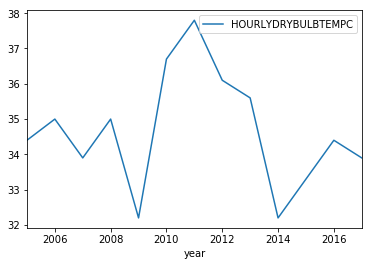

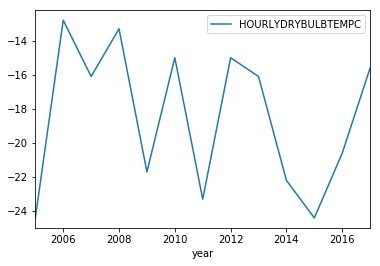

In [17]:
import matplotlib.pyplot as plt


#define a dataframe
dfYearMaxMinTemp= noNaNdf[[ "HOURLYDRYBULBTEMPC", "year"]]


#Replace NaN by mean Value
noNaNdfYearMaxMinTemp= dfYearMaxMinTemp.fillna(scipy.mean(dfYearMaxMinTemp)) 
print (noNaNdfYearMaxMinTemp.head(3) )

#Change the dataframe into integer value
noNaNdfYearMaxMinTemp["year"]=noNaNdfYearMaxMinTemp["year"].astype(int)
print(noNaNdfYearMaxMinTemp["HOURLYDRYBULBTEMPC"].dtype)


#Change the dataframe into numeric(float 64)
noNaNdfYearMaxMinTemp["HOURLYDRYBULBTEMPC"]=noNaNdfYearMaxMinTemp["HOURLYDRYBULBTEMPC"].convert_objects(convert_numeric=True)
print (noNaNdfYearMaxMinTemp["year"].dtype)

#printing the datatype
print(noNaNdfYearMaxMinTemp["HOURLYDRYBULBTEMPC"].dtype)

#creating Max temperature dataframe over years
maxtempdata= noNaNdfYearMaxMinTemp.groupby('year')['HOURLYDRYBULBTEMPC'].max().reset_index()
print(maxtempdata)

#creating Minimum temperature dataframe over years
mintempdata= (noNaNdfYearMaxMinTemp.groupby('year')['HOURLYDRYBULBTEMPC']).min().reset_index()
print(mintempdata)

#Varialbes for Max
maxx=maxtempdata[['year']]
maxyy=maxtempdata[['HOURLYDRYBULBTEMPC']]

#Variables for Min
minx=mintempdata[['year']]
minyy=mintempdata[['HOURLYDRYBULBTEMPC']]

# Line-plot  Max temperature over years
maxtempdata.plot(x="year", y="HOURLYDRYBULBTEMPC", kind='line')


#Line-plot min temperatures over years
mintempdata.plot(x="year", y="HOURLYDRYBULBTEMPC", kind='line')
plt.show()




# Plot for length of day

In [43]:
time_func = lambda x: pd.Timestamp(pd.to_datetime(x, format = '%H%M'))

dataforsunrise=noNaNdf['DAILYSunrise'].apply(time_func)
dataforsunset=noNaNdf['DAILYSunset'].apply(time_func)
daylenght=(dataforsunset-dataforsunrise).astype('timedelta64[m]')/60

print(dataforsunset.head(3))
print(dataforsunrise.head(3))
print(daylenght.head(3))

# daylen1= (daylenght.groupby('year', 'month')['hour']).mean().reset_index()
# print(daylen1)
daylendf=noNaNdf[['year', 'month']]
daylendf['daylight']=daylenght.abs()
print (daylendf.head(5))





0   1900-01-01 16:41:00
1   1900-01-01 16:41:00
2   1900-01-01 16:41:00
Name: DAILYSunset, dtype: datetime64[ns]
0   1900-01-01 07:24:00
1   1900-01-01 07:24:00
2   1900-01-01 07:24:00
Name: DAILYSunrise, dtype: datetime64[ns]
0    9.283333
1    9.283333
2    9.283333
dtype: float64
   year  month  daylight
0  2005      1  9.283333
1  2005      1  9.283333
2  2005      1  9.283333
3  2005      1  9.283333
4  2005      1  9.283333


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:

# Yearly max and min bar chart
# plt.figure(figsize=(12,8))
# sns.barplot(x="year", y="temp", noNaNdfYearMaxMinTemp=monthly.sort_values(['year', 'HOURLYDRYBULBTEMPC']))
# plt.xlabel("year")
# plt.ylabel("Temp")
# plt.title("Yearly max and min bar chart {}".format(station))


df1 = pd.DataFrame(index=noNaNdfYearMaxMinTemp.index, columns=list('year'))
df1 = df1.cumsum()
plt.figure(); 
df1.plot();



In [39]:

mintempdata = mintempdata.cumsum()
mintempdata.plot()




In [42]:
# plt.plot(maxx,maxyy, minx, minyy)
# plt.show()

   year  month HOURLYRelativeHumidity
0  2005      1                     71
1  2005      1                     77
2  2005      1                     76
      year  month HOURLYRelativeHumidity
4527  2005      7                     87
4528  2005      7                     87
4529  2005      7                     87
4530  2005      7                     87
4531  2005      7                     90
    year  HOURLYRelativeHumidity
0   2005               75.203230
1   2006               77.254032
2   2007               73.373656
3   2008               70.323263
4   2009               77.879032
5   2010               73.858871
6   2011               74.732527
7   2012               74.354839
8   2013               76.952957
9   2014               76.237903
10  2015               77.575269
11  2016               76.096774


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


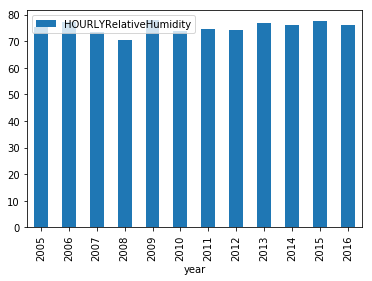

In [41]:
janYearlyData=noNaNdf[['year','month', 'HOURLYRelativeHumidity']]
print (janYearlyData.head(3))
janYearlyData=janYearlyData.loc[janYearlyData['month']==7]
print (janYearlyData.head(5))
janYearlyData["HOURLYRelativeHumidity"]=janYearlyData["HOURLYRelativeHumidity"].convert_objects(convert_numeric=True)

# create dataframe for humidity over years 
janYearlyData= (janYearlyData.groupby('year')['HOURLYRelativeHumidity']).mean().reset_index()
print(janYearlyData)


# plot for August Humidity over years 
janYearlyData.plot(x="year", y="HOURLYRelativeHumidity", kind='bar')
plt.show()
